<a href="https://colab.research.google.com/github/vvrgit/FDP-NNDL/blob/main/Image_Classification_Using_CNN_Custom_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Libraries

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

import numpy as np
import pandas as pd

import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras import models
from keras.models import Sequential
from keras.models import load_model

from keras.layers import Input, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.optimizers import RMSprop,Adadelta,SGD,Adagrad,Adam
from keras.applications.vgg16 import preprocess_input

import warnings
warnings.filterwarnings('ignore')

# Training Parameters

In [4]:
img_width, img_height = 150, 150
input_shape = (img_height, img_width, 3)
nb_train_samples = 4
nb_val_samples = 4
nb_epochs = 10
num_classes=2

#Image Pre-Processing

In [5]:
train_data_dir = '/content/drive/MyDrive/NNDL-Data/train'
val_data_dir = '/content/drive/MyDrive/NNDL-Data/validation'

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height),
                                                    batch_size=1, class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(val_data_dir, target_size=(img_width, img_height),
                                                        batch_size=1,class_mode='categorical')

Found 4 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


#Build CNN Model

In [10]:
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3), activation='relu', padding='valid',strides=1, input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='valid',strides=1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 148, 148, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 74, 74, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 36, 36, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │         663,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 665,042 (2.54 MB)

 Trainable params: 665,042 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

#Compile The Model

In [11]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [12]:
model_checkpoint_callback = keras.callbacks.ModelCheckpoint("best_Model.h5",save_best_only=True)

# CNN Model Training

In [14]:
history = model.fit( train_generator, callbacks = model_checkpoint_callback,epochs=nb_epochs, validation_data=validation_generator,verbose=1)
print('Training Completed!')
print(history.history.keys())

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.7292 - loss: 1.5838

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 883ms/step - accuracy: 0.7333 - loss: 1.5548 - val_accuracy: 0.5000 - val_loss: 1.1416
Epoch 2/10
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6111 - loss: 1.1633

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5667 - loss: 1.3004 - val_accuracy: 0.7500 - val_loss: 0.7477
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 1.0000 - loss: 0.3437 - val_accuracy: 0.5000 - val_loss: 0.9585
Epoch 4/10
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.1243    

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 1.0000 - loss: 0.1459 - val_accuracy: 0.5000 - val_loss: 0.5954
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.0779 - val_accuracy: 0.5000 - val_loss: 0.6392
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 1.0000 - loss: 0.0520 - val_accuracy: 0.5000 - val_loss: 0.6946
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.0081 - val_accuracy: 0.5000 - val_loss: 0.7513
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.0098 - val_accuracy: 0.5000 - val_loss: 0.8004
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.5000 - val_loss: 0.8480
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.5000 - val_loss: 0.9000
Training Completed!
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


#Classification With Trained CNN Model

In [15]:
img_path = '/content/drive/MyDrive/cat.jpg'
label = ['Cat','Dog']
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
thresholded = (features>0.5)*1
ind = np.argmax(thresholded)
print('Predicted Array:',thresholded)
print('Predicted Label:',label[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predicted Array: [[1 0]]
Predicted Label: Cat


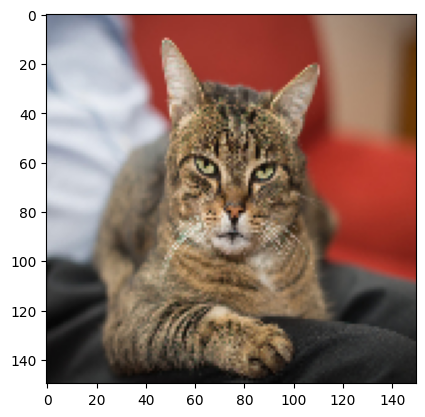

In [16]:
imgplot = plt.imshow(img)
plt.show()

In [17]:
model = load_model('/content/best_Model.h5')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 148, 148, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 74, 74, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 72, 72, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 36, 36, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │         663,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 665,044 (2.54 MB)

 Trainable params: 665,042 (2.54 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [18]:
img_path = '/content/drive/MyDrive/cat.jpg'
label = ['Cat','Dog']
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
thresholded = (features>0.5)*1
ind = np.argmax(thresholded)
print('Predicted Array:',thresholded)
print('Predicted Label:',label[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Predicted Array: [[1 0]]
Predicted Label: Cat


# **Thank You**